<a href="https://colab.research.google.com/github/nikhil1728/OTT_Analysis/blob/main/OTT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [2]:
data = data.drop(data[data['rating'].str.contains("min", na=False)].index)


In [3]:
data.shape

(8804, 12)

In [4]:
data['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


In [6]:
data.shape

(8804, 12)

**Columns and their value_counts::**
`In the given OTTplatfrom dataset, I have added category columns in the series list and I have written for loop to find their respective value_counts.`

In [7]:
series = ['type','director','country','date_added','release_year','listed_in']
for i in series:
  series_value_counts = data[i].value_counts()
  print(series_value_counts, end = '\n'*5 )

type
Movie      6128
TV Show    2676
Name: count, dtype: int64




director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
                          ..
Lee Yoon-jung              1
Anand Kamalakar            1
Luis Javier Henaine        1
Anubhav Sinha              1
Wong Kar Wai               1
Name: count, Length: 4527, dtype: int64




country
United States                                                      2815
India                                                               972
United Kingdom                                                      419
Japan                                                               245
South Korea                                                         199
                                                                   ... 
Mexico, United States, Spain, Colombia                                1
Canada, Norway                                   

**Series with their unique value**s

In [8]:
series = ['type','director','cast','release_year']
for i in series:
  series_value_counts = data[i].unique()
  print(series_value_counts, end = '\n'*5 )

['Movie' 'TV Show']




['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']




[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy']




[2020 2021 1993 2018 1996 1998 1997 2010 2

**Handling null values:**
I have created two lists category and numerical and written a for loop so that we can handle null values in categorical type as "unknown" category and full null values in cnumerical data type as '0'. After handling null values, if we observe we are having all rows as non-null values for each and every column.

In [9]:
category = ['director','country','cast','date_added','rating','duration']
numerical = ['release_year']


for cat_col in category:
  data[cat_col].fillna('Unknown '+ cat_col, inplace = True)

for num_col in numerical:
  data[num_col].fillna(0, inplace = True)
data

/tmp/ipython-input-796851247.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[cat_col].fillna('Unknown '+ cat_col, inplace = True)
/tmp/ipython-input-796851247.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,Unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          8804 non-null   object
 5   country       8804 non-null   object
 6   date_added    8804 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


**2) Un_nesting the columns**

In [11]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
listed_in_data = data.copy()
listed_in_data['listed_in'] = listed_in_data['listed_in'].str.split(',')
listed_in_data = listed_in_data.explode('listed_in')
#listed_in_data['listed_in'] = listed_in_data['listed_in'].str.strip()
listed_in_data = listed_in_data.reset_index(drop = True)
listed_in_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


**Insights after unnesting the lised_in column:**
A new data_set is created as listed_in_data. After unnesting the listed_in column,the number of rows increased rows from 8807 to 19323.This unnesting helps in further analysis of genere type.

In [13]:
director_data = data.copy()
director_data['director'] = director_data['director'].str.split(',')
director_data = director_data.explode('director')
director_data['director']  = director_data['director'].str.strip()
director_data = director_data.reset_index(drop = True)
director_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
9608,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
9609,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
9610,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Insights after unnesting director column:**
A new data_set is created as director_data. After unnesting the director column,the number of rows increased rows from 8807 to 9612.This unnesting helps in further analysis based on directors.

In [14]:
country_data = data.copy()
country_data['country'] = country_data['country'].str.split(',')
country_data = country_data.explode('country')
country_data['country'] = country_data['country'].str.strip()
country_data = country_data.reset_index(drop = True)
country_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
10845,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
10846,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
10847,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
10848,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Insights after unnesting country column:**
A new data_set is created as country_data. After unnesting the country column,the number of rows increased rows from 8807 to 10850.This unnesting helps in further analysis based on countries.

In [15]:
cast_data = data.copy()
cast_data['cast'] = cast_data['cast'].str.split(',')
cast_data = cast_data.explode('cast')
cast_data['cast'] = cast_data['cast'].str.strip()
cast_data = cast_data.reset_index(drop = True)
cast_data


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64947,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64948,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
64949,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**Insights after unnesting cast column:**
A new data_set is created as cast_data. After unnesting the cast column,the number of rows increased rows from 8807 to 64951 whic is a very huge difference.This unnesting helps in further analysis based on actors and their movies or tvshows they acted or appeared.

**By now, data cleaning is completed.**

In [16]:
import pandas as pd
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


1)Find the counts of each categorical variable both using graphical and non-
graphical analysis.

In [17]:
director_counts = director_data['director'].value_counts().head(10)


In [18]:
director_counts.index

Index(['Rajiv Chilaka', 'Jan Suter', 'Raúl Campos', 'Suhas Kadav',
       'Marcus Raboy', 'Jay Karas', 'Cathy Garcia-Molina', 'Martin Scorsese',
       'Youssef Chahine', 'Jay Chapman'],
      dtype='object', name='director')

<Axes: xlabel='director', ylabel='count'>

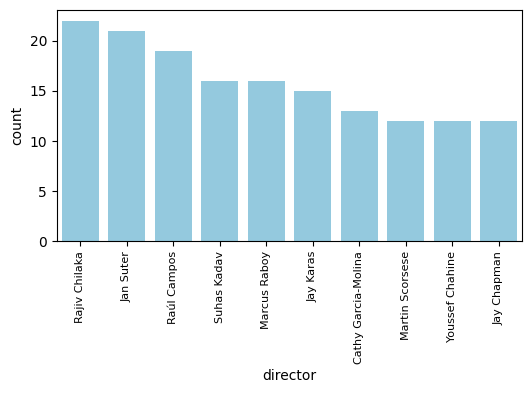

In [19]:
director_counts = director_data['director'].value_counts().head(10)
plt.figure(figsize=(6, 3))
plt.xticks(rotation=90, fontsize=8)
sns.countplot(data=director_data, x='director', order=director_counts.index, color='skyblue')

**Insights and recommendations:**
1.   From the above non_graphical analysis, we can infer that Rajiv Chilaka, Raul Campos, Jan Suter, Marcus Raboy and so on are the directors who has directed a lot of movies or tv show
2.   In the graphical analysis,I have used count plot, to create an visualisation about the directors and the count of their directed movies/tv shows.

In [20]:
cast_data['cast'].value_counts().head(20)

,count
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


<Axes: xlabel='cast', ylabel='count'>

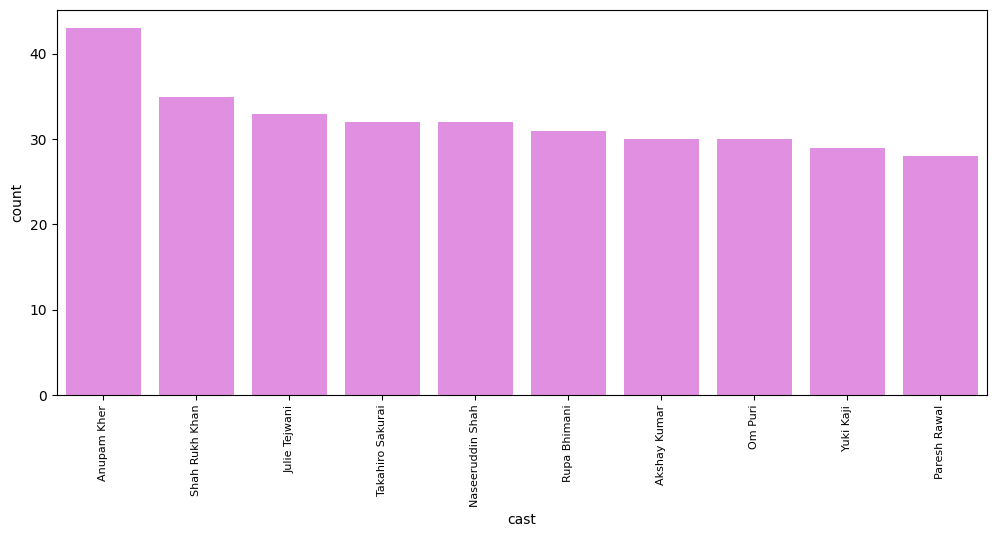

In [21]:
cast_counts = cast_data['cast'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 5))

plt.xticks(rotation=90, fontsize=8)

sns.countplot(data = cast_data, x='cast', order=cast_counts.index, color='violet')

**Insights and recommendations:**

1. Above analysis show the top actors who acted in the most of the films like Anupam Kher,sharuhkhan the most versatile actors in INIDA.
2. Count plot visulaisation is used to show the top actors acted in max number of o=movues/tvshows


In [22]:
country_data['country'].value_counts()

,count
country,
United States,3690
India,1046
United Kingdom,806
Canada,445
France,393
...,...
Sudan,1
Panama,1
Uganda,1


<Axes: xlabel='country', ylabel='count'>

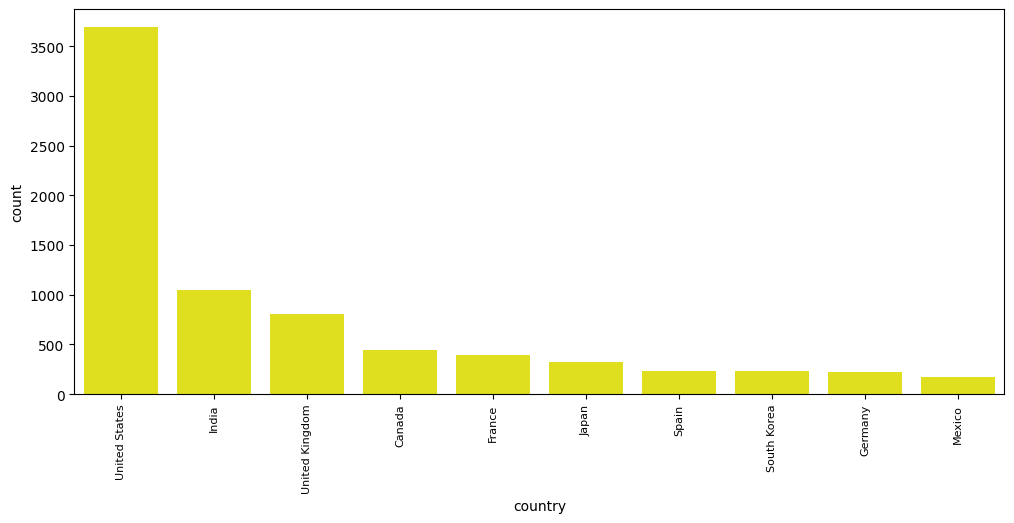

In [23]:
country_counts = country_data['country'].value_counts().head(10)
plt.figure(figsize=(12, 5))

plt.xticks(rotation=90, fontsize=8)

sns.countplot(data = country_data, x='country', order=country_counts.index, color='yellow')

**Insights and recommendations:**
 From the above analysis, we can infer that which is already a

1.  From the above analysis, we can infer that which is already a know fact that many movies/tv shows are released from the US Hollywood and those are very popular in the world followed by India, UK, Japan
2.   Used count plot to visualise the data in where it shows the top countries that produce movies/tvshows are US, India, UK, Canada and european countries.



In [24]:
listed_in_data['listed_in'].value_counts()

,count
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
LGBTQ Movies,1


<Axes: xlabel='listed_in', ylabel='count'>

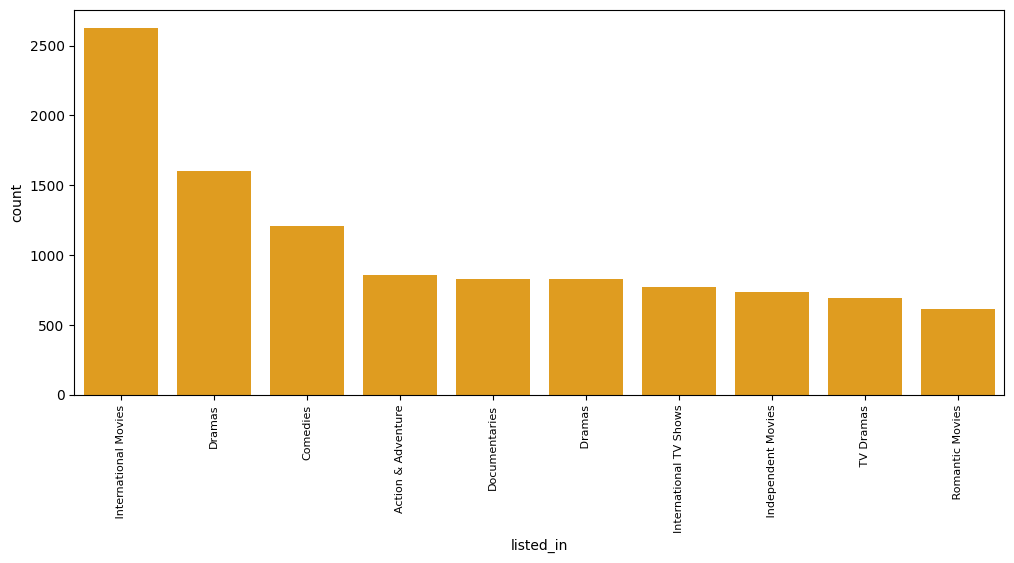

In [25]:
listed_in_counts = listed_in_data['listed_in'].value_counts().head(10)
plt.figure(figsize=(12, 5))

plt.xticks(rotation=90, fontsize=8)

sns.countplot(data = listed_in_data, x='listed_in', order=listed_in_counts.index, color='orange')

**Insights:**


1. The most launced genres in movie or tv shows are International Movies and  tv shows, dramas, comdey and so on
2.  From the count plot, we can clearly see that International Movies and  tv shows, dramas, comdey occupies major share in the given data set. Other genres also has a huge competetion in between them. There isn't much difference between them.



In [26]:
data['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


<Axes: xlabel='type', ylabel='count'>

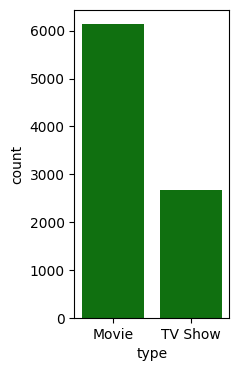

In [27]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(2, 4))
sns.countplot(data = data, x='type', order=type_counts.index, color='green')

**Insights and recommendations:**
As expected, movies market is always huge market compare to tv shows. It might be beacuse there are few reasons like:


1.   TV shows are lengthy to watch compare to movies.
2.   Movies are simple, enjoyable and happy to watch them.



In [28]:
data['release_year'].value_counts().head(20)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


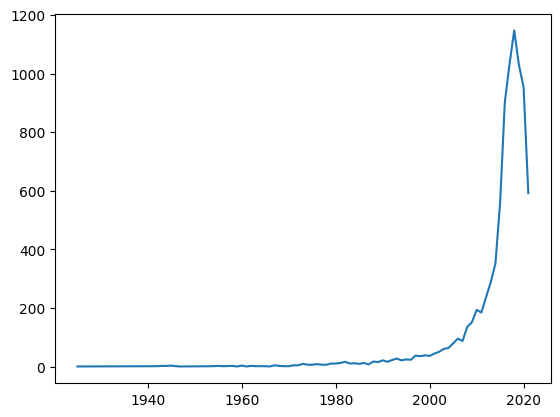

In [29]:
r = data['release_year'].value_counts().sort_index()
plt.plot(r.index,r.values)

**Insights and recommendations:**


1.   From the non -graphical analysis, we can clearly see that upto 2006, only two digit number of  movies are released.
2.   After 2006, three digit count has started and from 2019 its is four digits count.
3. From the line graph we can clearly obseve that, there is an almost steep curve in movies releasing all over the world  after 2004.
4. From 2000 we can clearly see that movies releaseing is almost in positive slope, but this trend changes after 2016, movies released in 2019, 2020 are less tcompared to 2017, 2018 that's beacuse of covid-19 breakout.



In [30]:
data['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"February 2, 2017",1
"September 11, 2019",1
"May 17, 2015",1


In [31]:
data['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [32]:
data['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
90 min,152
97 min,146
...,...
228 min,1
18 min,1
205 min,1


***2. Comparison of tv shows vs. movies.***

a)Find the number of movies produced in each country and pick the top 10
countries.

In [33]:
movies_filtered_country_data = country_data[country_data['type'] == 'Movie']
top_6_countries_movies = movies_filtered_country_data.groupby('country')['title'].count().sort_values(ascending = False).head(6)
top_6_countries_movies

,title
country,
United States,2752
India,962
United Kingdom,534
Canada,319
France,303
Germany,182


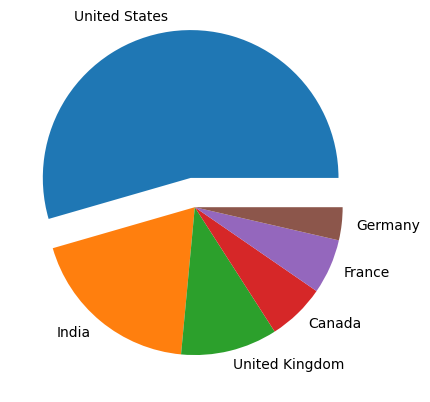

In [34]:
top_6_countries_movies = movies_filtered_country_data.groupby('country')['title'].nunique().sort_values(ascending = False).head(6)
myexplode = [0.2,0,0,0,0,0]
plt.pie(top_6_countries_movies, labels = top_6_countries_movies.index, explode = myexplode)
plt.show()

b.Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [35]:
tvshow_filtered_country_data = country_data[country_data['type'] == 'TV Show']
top_countries_tv_show = tvshow_filtered_country_data.groupby('country')['title'].nunique().sort_values(ascending = False).head(15)
top_countries_tv_show

,title
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


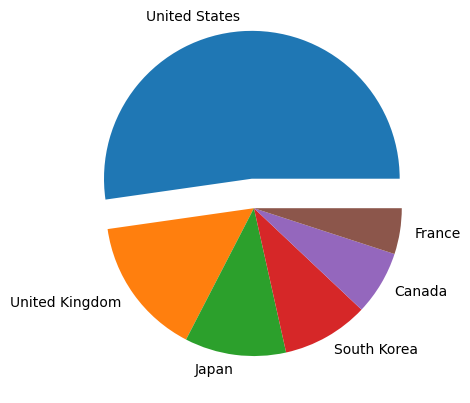

In [36]:
top_6_countries_tv_show = tvshow_filtered_country_data.groupby('country')['title'].nunique().sort_values(ascending = False).head(6)
myexplode = [0.2,0,0,0,0,0]
plt.pie(top_6_countries_tv_show, labels = top_6_countries_tv_show.index, explode = myexplode)
plt.show()

In [37]:
top_10_countries = country_data['country'].value_counts().index[:10]
top_10_countries_dataframe = country_data[country_data['country'].isin(top_10_countries)]

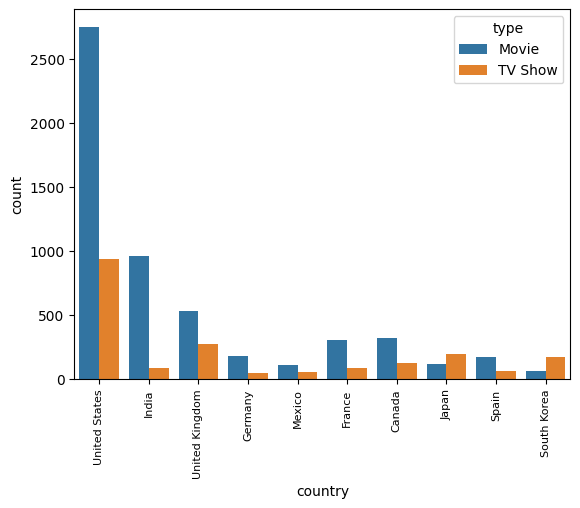

In [38]:

sns.countplot(data=top_10_countries_dataframe, x='country', hue='type')
plt.xticks(rotation=90, fontsize=8)
plt.show()

**Insights and recommendations:**



1.   On comparing the top 6 countries movies and tv shows market, south korean and Japanese tv shows occupy major market in tvshow than countries like Germany and Inida.
2.   By bivariate analysis on tv show and movies, we can clearly infer that movies market is far more bigger than tv show market.
3.   In both TV shows and movies, US always occupies the biggest market that's beacuse of the best film industry the HOLLYWOOD.
4. From the bivariate analysis, we can also observe that all countries movie market is always bigger than tv show market but this principle is not applicate to Japan and South Korea. So we can infer that Japanese and South Korean tv shows market or more popular than movie market.

***3. What is the best time to launch a TV show?***

a)Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [39]:
week_month_data = data.copy()
week_month_data['date_added'] = pd.to_datetime(week_month_data['date_added'],errors ='coerce')

week_month_data['week_name'] = week_month_data['date_added'].dt.day_name()
week_month_data['month_name'] = week_month_data['date_added'].dt.month_name()

In [40]:
movies_filtered_data = week_month_data[week_month_data['type'] == 'Movie']
movies_filtered_data.groupby('week_name')['show_id'].count().sort_values(ascending = False)


,show_id
week_name,
Friday,1566
Thursday,1053
Wednesday,906
Tuesday,852
Monday,628
Sunday,569
Saturday,557


In [41]:
tvshow_filtered_data = week_month_data[week_month_data['type'] == 'TV Show']
tvshow_filtered_data.groupby('week_name')['show_id'].count().sort_values(ascending = False)


,show_id
week_name,
Friday,910
Wednesday,370
Thursday,334
Tuesday,330
Saturday,246
Monday,217
Sunday,171


<Axes: xlabel='week_name', ylabel='count'>

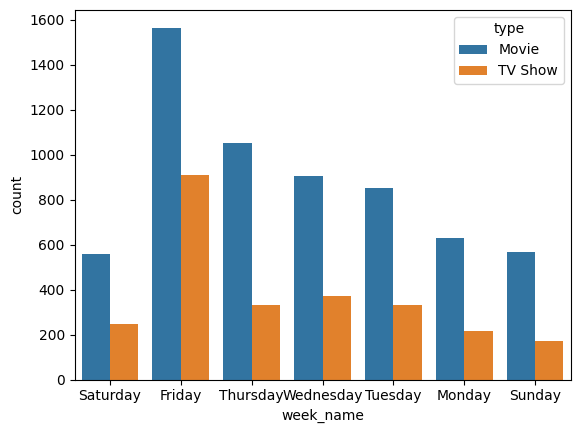

In [42]:
sns.countplot(data = week_month_data, x= "week_name", hue = 'type')

**Insights and recommendations:**

1.   In both TV shows and movies, friday is the best weekday to launch movies or webseries in online platfrom that's beacause its almost the weekend and people are has so excitement to watch entertainment stuff.
2.   Incase of movies adn tv shows, large number of them are added in OTTplatfrom OTT is friday, thursady, wednesday, tuesday. Even though there might be slight differneces in the order of releasing w.r.t. movies and tv shows but in these days of week is most recommendable time but FRIDAY is always the best as per data.



b)Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [43]:
movies_filtered_data = week_month_data[week_month_data['type'] == 'Movie']
movies_filtered_data.groupby('month_name')['show_id'].count().sort_values(ascending = False)


,show_id
month_name,
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498


In [44]:
tvshow_filtered_data = week_month_data[week_month_data['type'] == 'TV Show']
tvshow_filtered_data.groupby('month_name')['show_id'].count().sort_values(ascending = False)

,show_id
month_name,
July,254
December,250
September,246
June,232
August,230
October,210
April,209
March,205
November,199


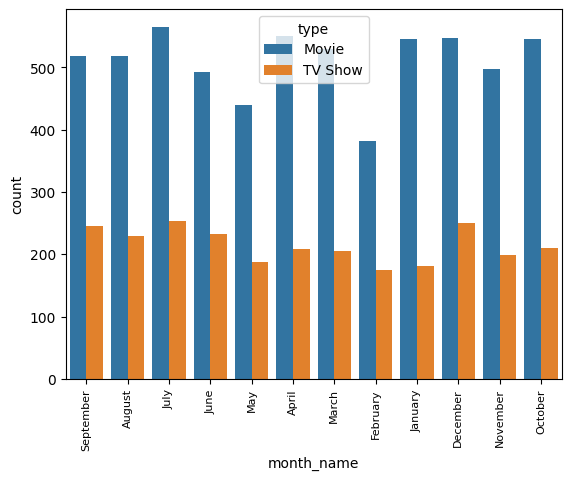

In [45]:
sns.countplot(data = week_month_data, x = "month_name", hue = 'type')
# plt.figure(figsize=(12, 5))
plt.xticks(rotation=90, fontsize=8)

plt.show()

**Insights and recommendations:**


1.   From the bivaraiate anlysis, december is the best month to release movies or tv shows that's because of winter and christmas celebrations, people love to saty in home and chill with OTTplatfrom.
2.   Febreaury is always at the last incase of tv shows and movies.




***4)Analysis of actors/directors of different types of shows/movies.***

a. Identify the top 10 actors who have appeared in most movies or TV shows.

In [46]:
movies_filtered_cast_data = cast_data[cast_data['type'] == 'Movie']
top_10_cast_in_movies = movies_filtered_cast_data.groupby('cast')['title'].nunique().sort_values(ascending = False).head(10)
top_10_cast_in_movies

,title
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Om Puri,30
Akshay Kumar,30
Paresh Rawal,28
Julie Tejwani,28
Amitabh Bachchan,28
Boman Irani,27


<BarContainer object of 10 artists>

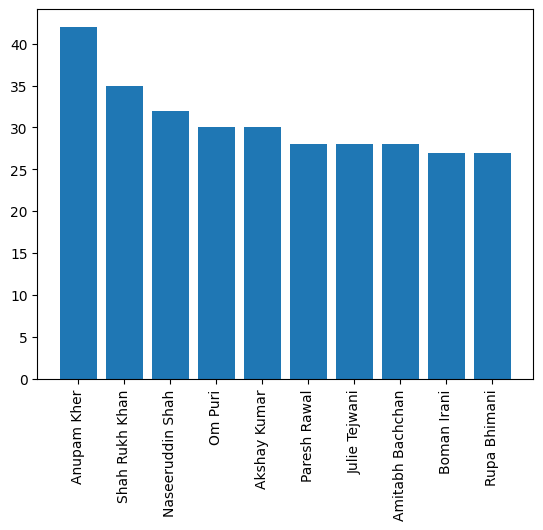

In [47]:
x = top_10_cast_in_movies.index
y = top_10_cast_in_movies
plt.xticks(rotation = 90)
plt.bar(x,y)

**Insights and recommendations:** From the analysis on the cast based on their movies acted, bollywood actors like Anupam Kher, Shah Rukh Khan, Naseeruddin Shah,Akshay Kumar, OM Puri, Julie Tejwani(voice actresss)in Inida shows the clear dominance than other countries

In [48]:
tvshow_filtered_cast_data = cast_data[cast_data['type'] == 'TV Show']
top_10_cast_in_tvshow = tvshow_filtered_cast_data.groupby('cast')['title'].nunique().sort_values(ascending = False).head(10)
top_10_cast_in_tvshow

,title
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Ai Kayano,17
Junichi Suwabe,17
Daisuke Ono,17
Yuichi Nakamura,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14


<BarContainer object of 10 artists>

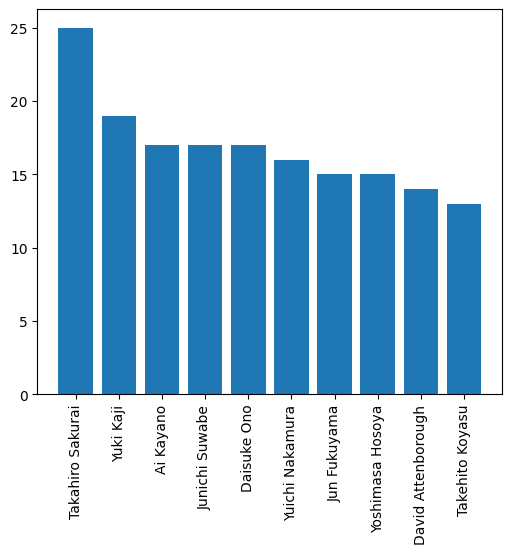

In [49]:
x = top_10_cast_in_tvshow.index
y = top_10_cast_in_tvshow
plt.figure(figsize=(6, 5))
plt.xticks(rotation = 90)
plt.bar(x,y)

**Insights and recommendations**:
From the analysis on actors in the  tv shows, Japanese voice actors beat the race in the number of tv shows they were part of it, that's beacuse of Japanes animies are famous world wide and they occupy huge market especially in the animie world.

***5. Which genre movies are more popular or produced more***

In [50]:
top_preferred_genre = listed_in_data.groupby('listed_in')['title'].nunique().sort_values(ascending = False)

In [51]:
top_preferred_genre

,title
listed_in,
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
LGBTQ Movies,1


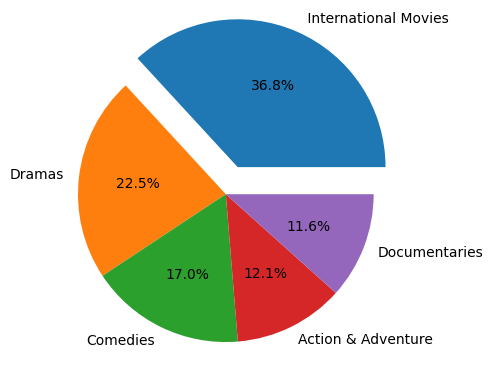

In [52]:
top_5_preferred_genre = listed_in_data.groupby('listed_in')['title'].nunique().sort_values(ascending = False).head(5)
myexplode = [0.2, 0, 0, 0,0]
plt.pie(top_5_preferred_genre, labels = top_5_preferred_genre.index, explode = myexplode, autopct='%1.1f%%')
plt.show()

**Insighst and recommendations:**

1.   International movies and dramas are far ahead in competetion than any other genres in both tvshows and movies
2.   Comedy, international tv shows, documentaries stand next to international movies and dramas.
3. Action adventure, romantic movies, tv dramas, kids shows, horrors, thrillers also has a good market but not more than the above mentioned genres.



6.Find After how many days the movie will be added to OTTplatfrom after the release of
the movie (you can consider the recent past data)

In [53]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [54]:
data.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [55]:
data_diff = data.copy()
data_diff['date_added'] = pd.to_datetime(data_diff['date_added'], errors='coerce')
data_diff['release_year'] = pd.to_datetime(data_diff['release_year'], format='%Y')


In [56]:
data_diff

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007-01-01,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018-01-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009-01-01,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006-01-01,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [57]:
data_diff['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [58]:
data_diff['days_to_add'] = (data_diff['date_added'] - data_diff['release_year'])

In [59]:
data_diff['days_to_add']

,days_to_add
0,633 days
1,266 days
2,266 days
3,266 days
4,266 days
...,...
8802,4706 days
8803,546 days
8804,3956 days
8805,5123 days


In [60]:
days_to_add_series = data_diff['days_to_add'].value_counts()
days_to_add_series

,count
days_to_add,
334 days,37
546 days,35
639 days,35
364 days,29
365 days,28
...,...
3160 days,1
5352 days,1
2793 days,1


In [61]:
days_to_add_series_df = pd.DataFrame({'number_of_days_difference':days_to_add_series.index,'count_of_number_of_days_difference':days_to_add_series.values })

In [62]:
days_to_add_series_df

,number_of_days_difference,count_of_number_of_days_difference
0,334 days,37
1,546 days,35
2,639 days,35
3,364 days,29
4,365 days,28
...,...,...
2694,3160 days,1
2695,5352 days,1
2696,2793 days,1
2697,4343 days,1


<Axes: xlabel='number_of_days_difference', ylabel='count_of_number_of_days_difference'>

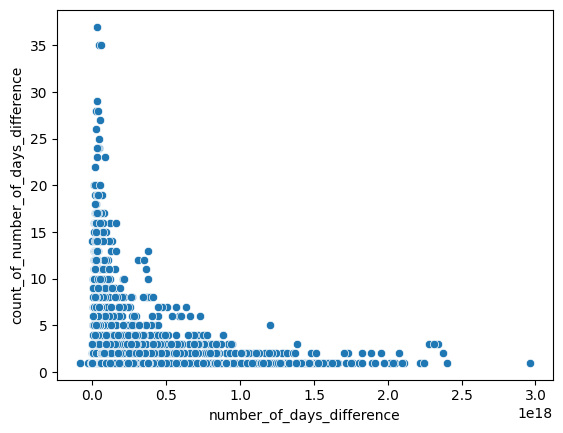

In [63]:
sns.scatterplot(data =  days_to_add_series_df, x= 'number_of_days_difference', y = 'count_of_number_of_days_difference')

**Insights and recommendations:**


1.   The best time to add a movie or tv show in OTTplatfrom from the scatter plot, we can infer that max one to two years of the relase year but it should not be more than two years.
2.   Large Number of movies/tvshows are aded to OTTplatfrom almost before a year or two which is the best time to rlease after  release of the movie

